In [1]:
import sys, os
os.chdir('/home/koritskiy/rqc/ferrimagnet/')
from modules.energy import *
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.pyplot import figure
from scipy import optimize

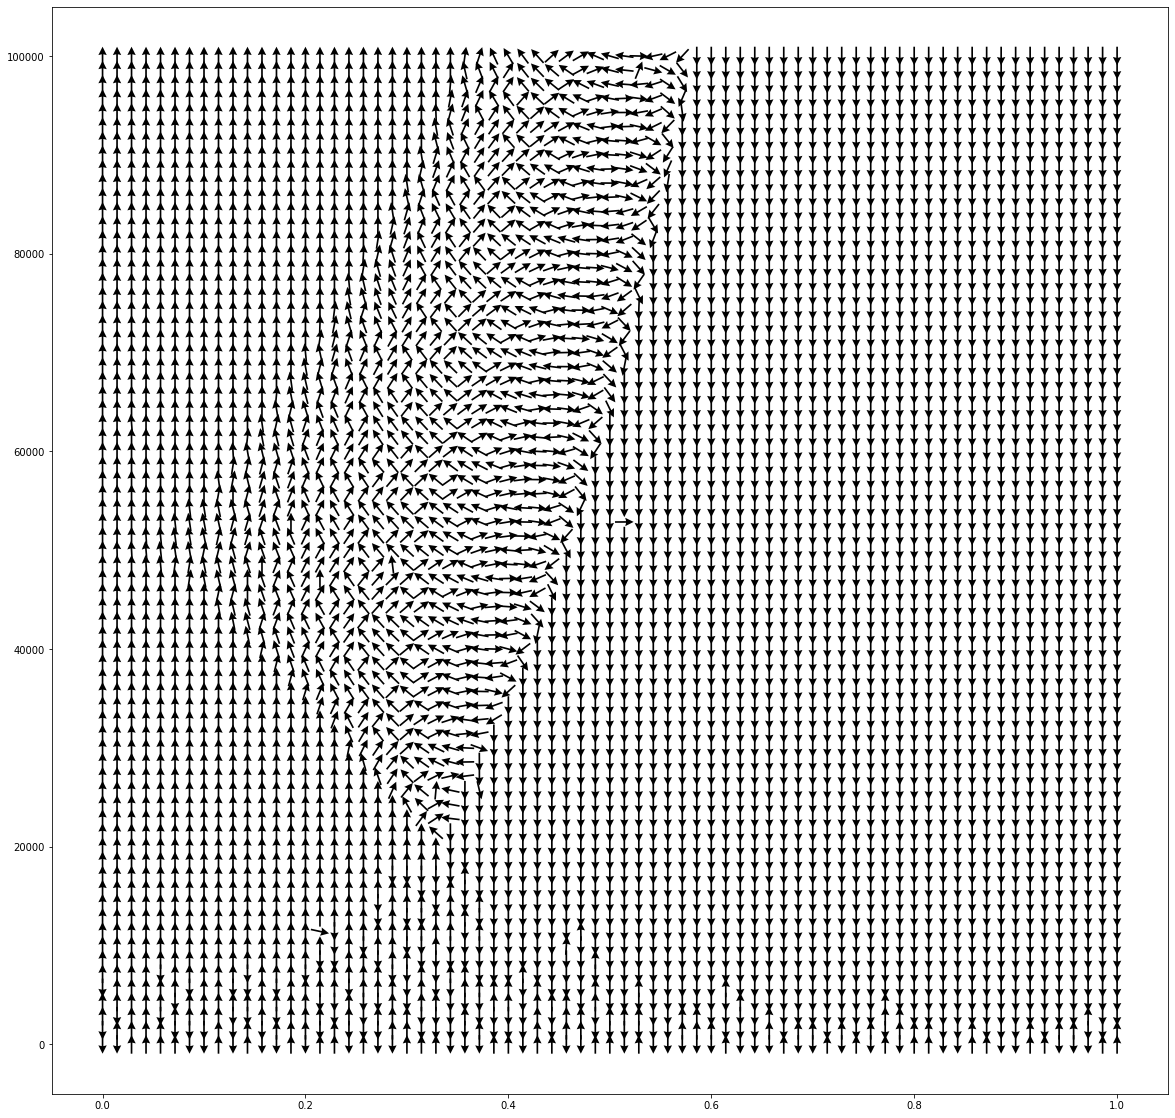

In [5]:
# Generate coordinate grid
N = 71
X = np.linspace(0, 1, N)
H = np.linspace(0, 10 ** 5, N)
XX, HH = np.meshgrid(X, H)
thetas = np.zeros((N, N))
# x and y numerates grid points, not coordinates
for x in range(len(H)):
    for y in range(len(X)):
        x0 = np.random.rand() * 2 * np.pi
        args = XX[x, y], HH[x, y]
        thetas[x, y] = optimize.fmin_cg(energy,
                                        x0,
                                        fprime=denergy,
                                        args=args,
                                        disp=False)[0]
# thetas[x, y] = optimize.minimize(Energy, x0,method = 'Nelder-Mead', args=args).x[0]
# Determine x and y projections of spins
Md_x = np.sin(thetas)
Md_y = np.cos(thetas)

# fig, ax = plt.subplots()
plt.figure(figsize=(20,20))
plt.quiver(XX, HH, Md_x, Md_y, pivot='mid', scale=60,color='black', width=0.0015, headwidth=5)

In [ ]:
T = np.linspace(0, 2*pi, 100)
Y = Energy(T, 0.52, 8 * 10 **4)
plt.plot(T, Y)